<a href="https://colab.research.google.com/github/philBram/machine_learning_with_tensorflow_project/blob/main/colorize_black_and_white.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from pycocotools.coco import COCO

In [10]:
train_dir = 'train2017'
val_dir = 'val2017'
test_dir = 'test2017'
annotations_dir = 'annotations'

if os.path.exists(train_dir) and os.path.exists(val_dir) and os.path.exists(test_dir) and os.path.exists(annotations_dir):
    print("COCO dataset is already downloaded and unzipped.")
else:
  !wget  http://images.cocodataset.org/zips/train2017.zip
  !wget  http://images.cocodataset.org/zips/val2017.zip
  !wget  http://images.cocodataset.org/zips/test2017.zip
  !wget  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
  
  !unzip -q train2017.zip
  !unzip -q val2017.zip
  !unzip -q test2017.zip
  !unzip -q annotations_trainval2017.zip

  !rm -f train2017.zip
  !rm -f val2017.zip
  !rm -f test2017.zip
  !rm -f annotations_trainval2017.zip

COCO dataset is already downloaded and unzipped.


In [ ]:
annFile = 'annotations/instances_train2017.json'
coco = COCO(annFile)

categories = coco.loadCats(coco.getCatIds())
print("\nTotal number of categories:", len(categories))
print("Category information:")

for category in categories:
    print("Category ID:", category['id'])
    print("Category Name:", category['name'])
    print("Number of images:", len(coco.getImgIds(catIds=category['id'])))
    print("----")

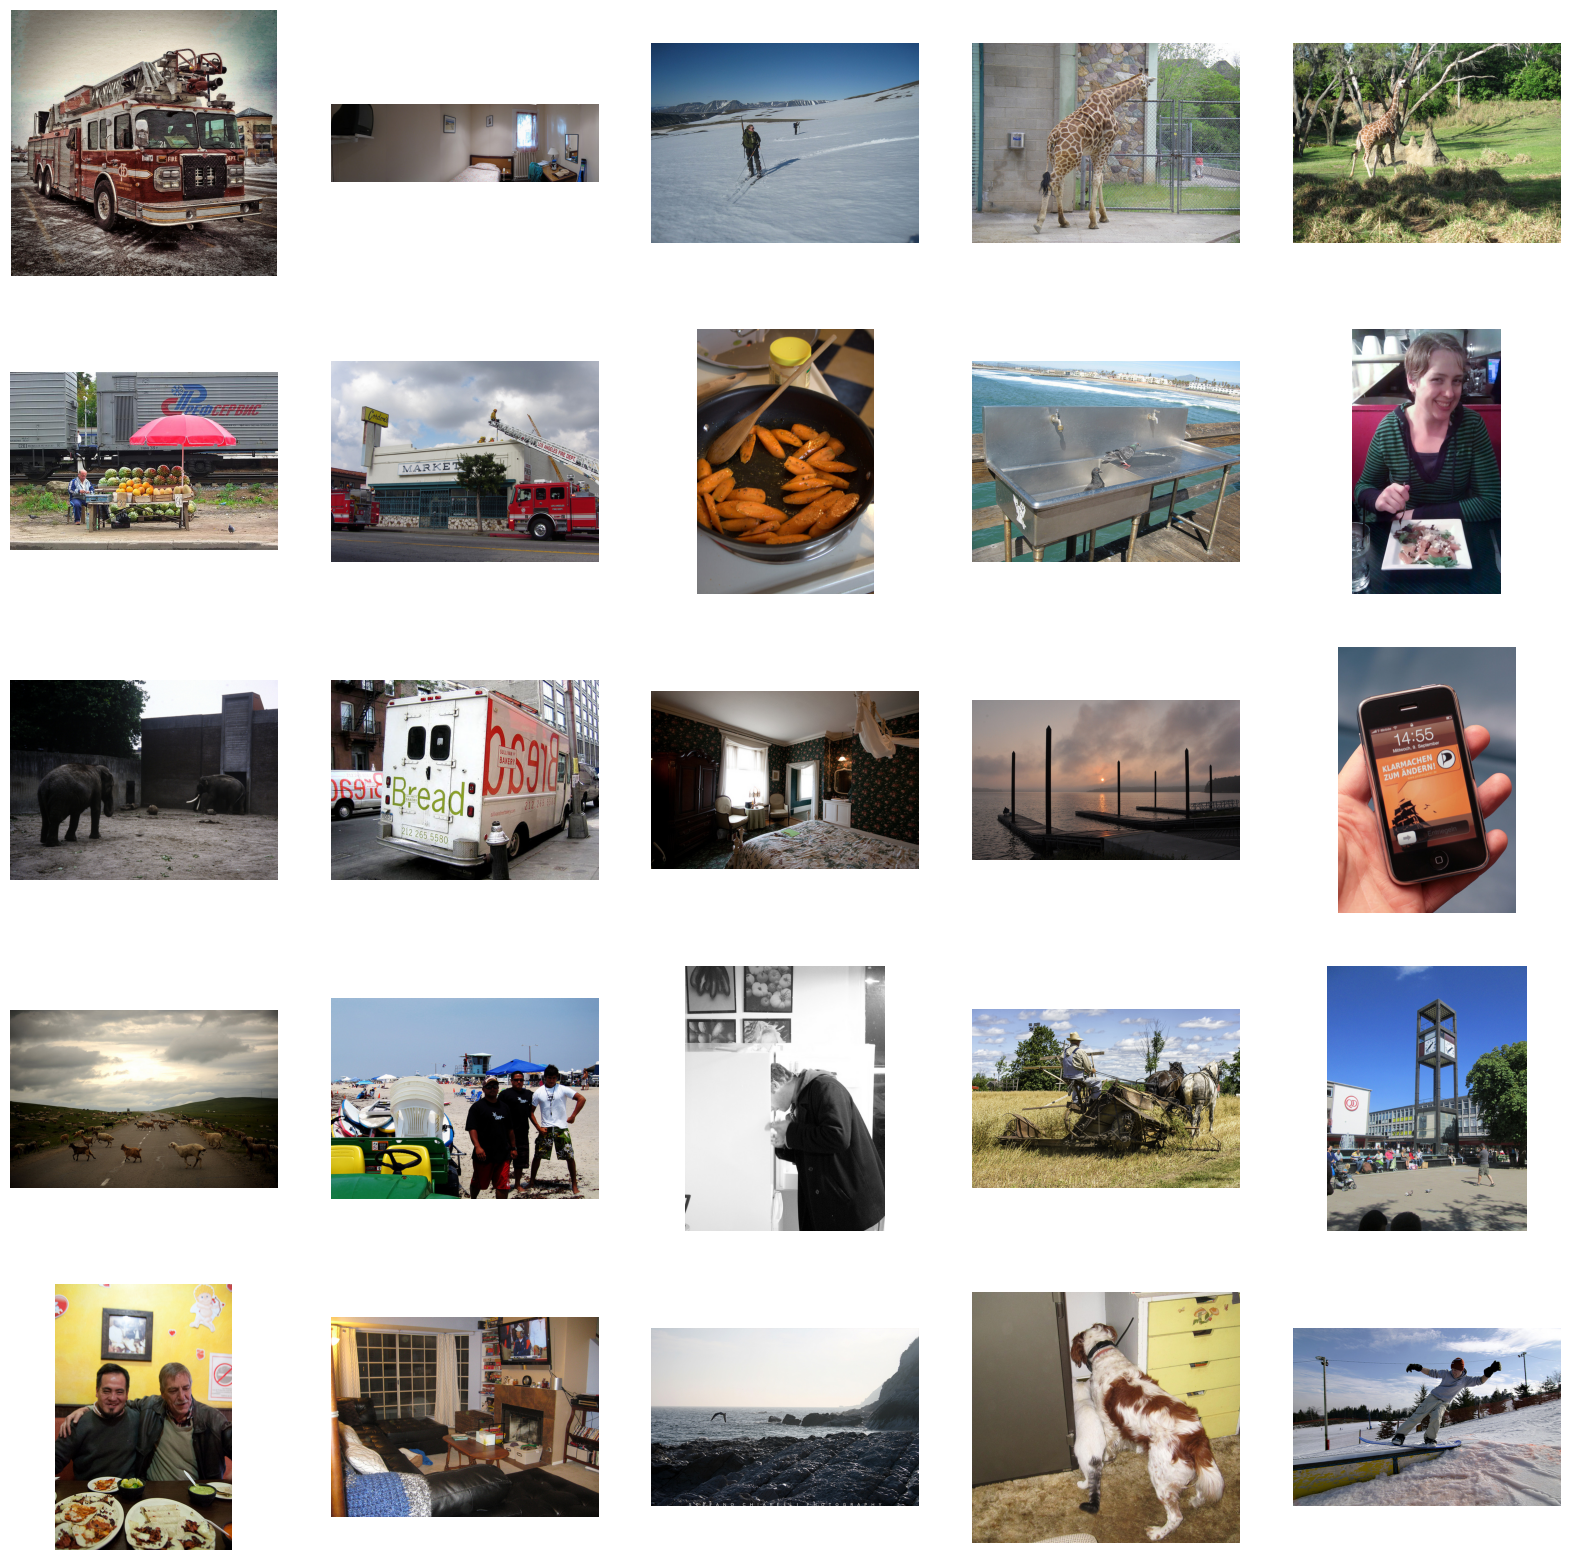

In [35]:
ncols = 5
nrows = 5

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

train_images = np.array(os.listdir(train_dir))
train_max_num = len(os.listdir(train_dir))
pic_index = np.random.randint(0, train_max_num, ncols * nrows)

images_random = [os.path.join(train_dir, fname) for fname in train_images[pic_index]]

for i, img_path in enumerate(images_random):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()